# Goal

The project is to predict whether or not the user is going to repay the loan.

# Challenge Description



We have access to a specific bank loan data. We have data about all loans asked to the bank,
whether the bank decided to grant it and, finally, whether the borrower managed to repay it. We
also have info about the borrower at the moment she is asking for the loan.

We have to come up with a better strategy to grant loans. 
Specifically we should:

1)Build a model which is better than the bank model.

For simplicity, assume that:
If you grant the loan and the it doesn't get repaid, you lose 1

If you grant the loan and the it does get repaid, you gain 1

If you don't grant the loan, you gain 0

2)Using the rules above, compare bank profitability vs your model profitabilit

3)Describe the impact of the most important variables on the prediction. Also, focus on the
variable "is_employed", which describes whether the borrower is employed when she
asks for the loan. How does this variable impact the model? Explain why?

4)Are there any other variables, not in the data provided, that you'd have liked to include in
the model?


# Data

### "loan_table" - general information about the loan

Columns:
    
loan_id:  the id of the loan. Unique by loan. Can be joined to loan id in the other table
    
loan_purpose: the reason for asking the loan: investment, business, emergency_funds,home, other.
        
date: when the loan was asked 
    
loan_granted: whether the loan was granted 
    
loan_repaid:whether the loan was repaid. NA means that the loan was not granted

    

### borrower_table" - information about the borrower


loan_id :  the id of the the loan. Unique by loan. Can be joined to loan id in the other table

is_first_loan :  did she ask for any other loans in her lifetime?

fully_repaid_previous_loans : did she pay on time all of her previous loans? If this is the first loan, it is NA
(1 represents pay on time; 0 represents that the user did not pay on time, na represents the first time)
                               
currently_repaying_other_loans : is she currently repaying any other loans? 
                               If this is the first loan, it is NA
          (1 represents that the user is repaying other loan; 0 represents that the user the user is not repaying other loan, na represents the first time)
                               
total_credit_card_limit : total credit card monthly limit

avg_percentage_credit_card_limit_used_last_year: on an average, how much did she use of her credit card limit in the previous 12 months. This number can be >1 since it is possible to go above the credit card limit

saving_amount : total saving account balance when she asked for the loan

checking_amount : total checking account balance when she asked for the loan

is_employed : whether she is employed (1) or not (0)

yearly_salary : how much she earned in the previous year

age :her age

dependent_number : number of people she claims as dependent

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import re
loan=pd.read_csv('loan_table.csv')
loan.head()   #5rows

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,3/15/2012,0,NaN
1,496811,investment,1/17/2012,0,NaN
2,929493,other,2/9/2012,0,NaN
3,580653,other,6/27/2012,1,1.0
4,172419,business,5/21/2012,1,0.0


In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
loan_id         101100 non-null int64
loan_purpose    101100 non-null object
date            101100 non-null object
loan_granted    101100 non-null int64
loan_repaid     47654 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [3]:
borrower=pd.read_csv('borrower_table.csv')
borrower.head()   #5rows

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [4]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes: fl

In [5]:
#result = pd.merge(left, right, on='key'), by default,how='inner'
loanborrower=pd.merge(loan,borrower,on='loan_id')
loanborrower.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,3/15/2012,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,1/17/2012,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2/9/2012,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,6/27/2012,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,5/21/2012,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [6]:
loanborrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 16 columns):
loan_id                                            101100 non-null int64
loan_purpose                                       101100 non-null object
date                                               101100 non-null object
loan_granted                                       101100 non-null int64
loan_repaid                                        47654 non-null float64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_empl

In [7]:
# choose data with loan granted 
# because our goal is  to predict whether or not the user is going to repay the loan
#  loanborrower['loan_granted'] == 1 returns true or false
loanborrower = loanborrower[loanborrower['loan_granted'] == 1]
loanborrower.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,580653,other,6/27/2012,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,5/21/2012,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,780070,business,3/14/2012,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,303138,emergency_funds,8/31/2012,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,91475,investment,5/25/2012,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [8]:
# drop useless features
loanborrower = loanborrower.drop(labels=['loan_id','date','loan_granted'], axis=1, inplace=False)

In [9]:
loanborrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 13 columns):
loan_purpose                                       47654 non-null object
loan_repaid                                        47654 non-null float64
is_first_loan                                      47654 non-null int64
fully_repaid_previous_loans                        21865 non-null float64
currently_repaying_other_loans                     21865 non-null float64
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    46751 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null int64
yearly_salary                                      47654 non-null int64
age                                                47654 non-null int64
dependent_number 

In [10]:
loanborrower.describe()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,47654.000000,47654.000000,21865.000000,21865.000000,47654.000000,46751.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000
mean,0.644353,0.541172,0.902493,0.297736,4527.848659,0.700091,2022.366580,3499.160595,0.909829,29245.991942,41.524657,3.752445
std,0.478714,0.498307,0.296654,0.457273,1975.127016,0.177729,1493.410303,2155.128304,0.286429,16286.512395,12.817587,2.621351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3100.000000,0.580000,914.000000,1873.000000,1.000000,18900.000000,32.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,4400.000000,0.710000,1553.000000,3024.500000,1.000000,29400.000000,41.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,5800.000000,0.830000,2878.000000,4842.000000,1.000000,40200.000000,50.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13165.000000,1.000000,97200.000000,79.000000,8.000000


# Visualization

In [11]:
#seaborn: statistical data visualization
import seaborn as sns
import matplotlib.pyplot as plt

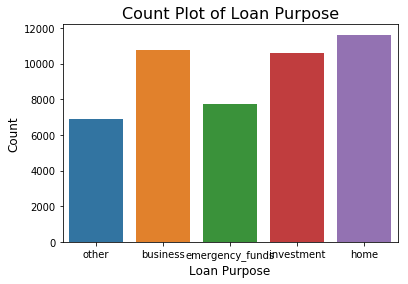

In [12]:
axx=sns.countplot(x='loan_purpose', data=loanborrower)
axx.set_xlabel('Loan Purpose', fontsize=12)
axx.set_ylabel('Count', fontsize=12)
axx.set_title('Count Plot of Loan Purpose', fontsize=16)
plt.show()

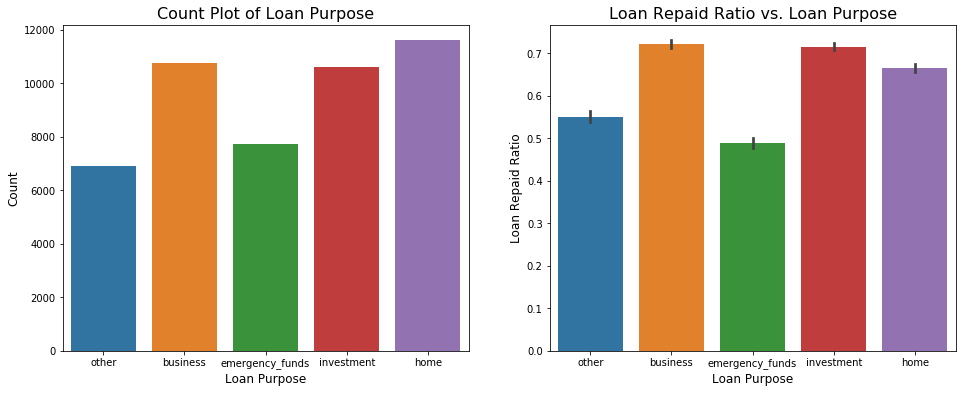

In [13]:
# visualization of 'loan_purpose'
#categorical variable 
## Initialize Figure and Axes object, make use of the plt.subplots() function to which you pass the figsize argument.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='loan_purpose', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('Loan Purpose', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Loan Purpose', fontsize=16)

sns.barplot(x='loan_purpose', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('Loan Purpose', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. Loan Purpose', fontsize=16)
#plt.tight_layout()
plt.show()

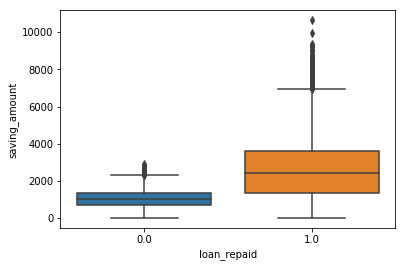

In [14]:
sns.boxplot(x='loan_repaid', y='saving_amount',data=loanborrower)
plt.show()

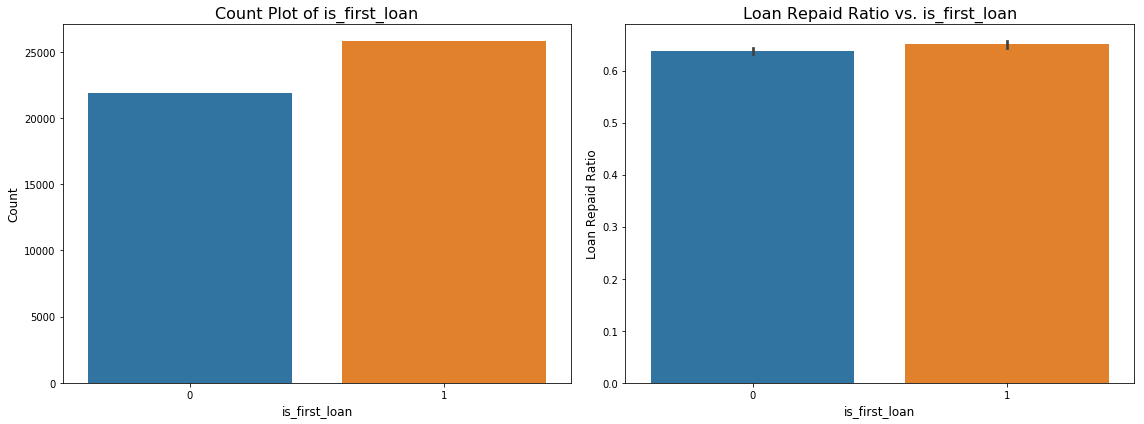

In [15]:
# visualization of 'is_first_loan'
#categorical variable 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='is_first_loan', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('is_first_loan', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of is_first_loan', fontsize=16)

sns.barplot(x='is_first_loan', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('is_first_loan', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. is_first_loan', fontsize=16)
plt.tight_layout()
plt.show()


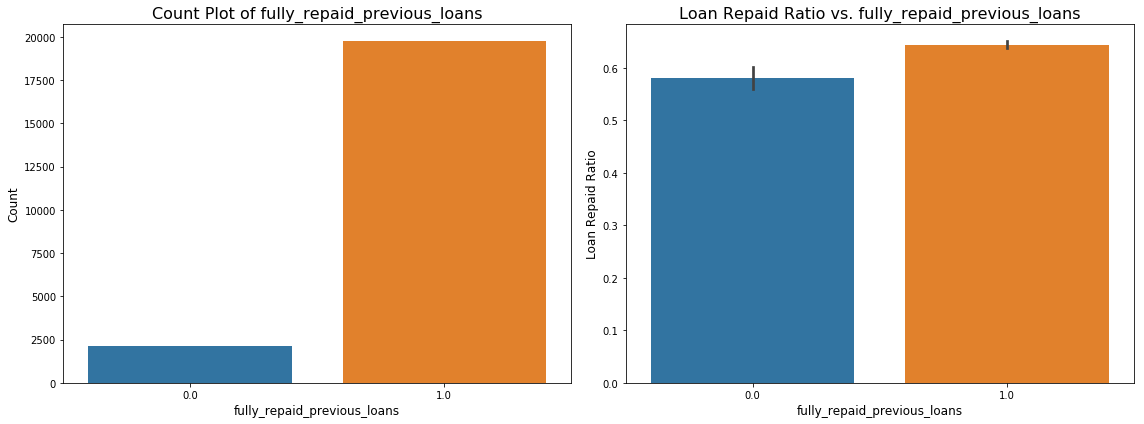

In [16]:
# visualization of 'fully_repaid_previous_loans'
#categorical variable 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='fully_repaid_previous_loans', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('fully_repaid_previous_loans', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of fully_repaid_previous_loans', fontsize=16)

sns.barplot(x='fully_repaid_previous_loans', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('fully_repaid_previous_loans', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. fully_repaid_previous_loans', fontsize=16)
plt.tight_layout()
plt.show()

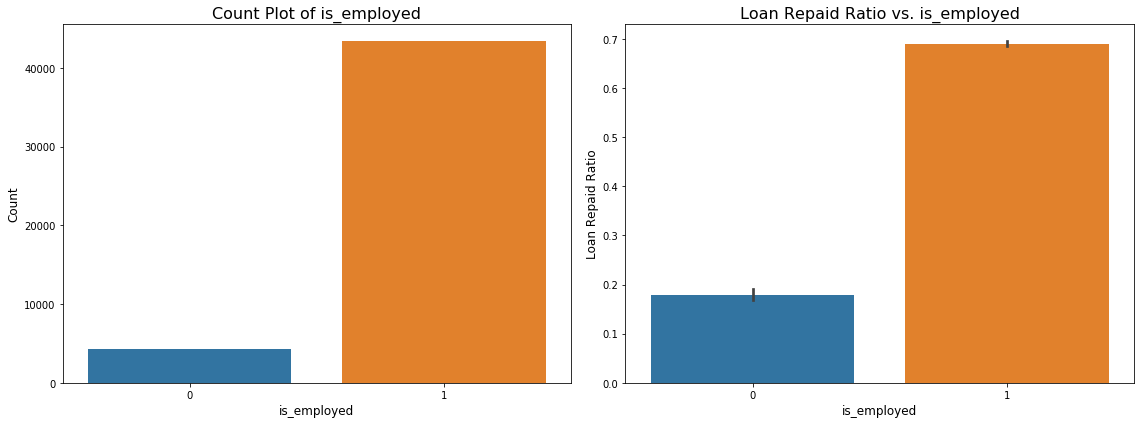

In [17]:
# visualization of 'is_employed'
#categorical variable 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='is_employed', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('is_employed', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of is_employed', fontsize=16)

sns.barplot(x='is_employed', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('is_employed', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. is_employed', fontsize=16)
plt.tight_layout()
plt.show()

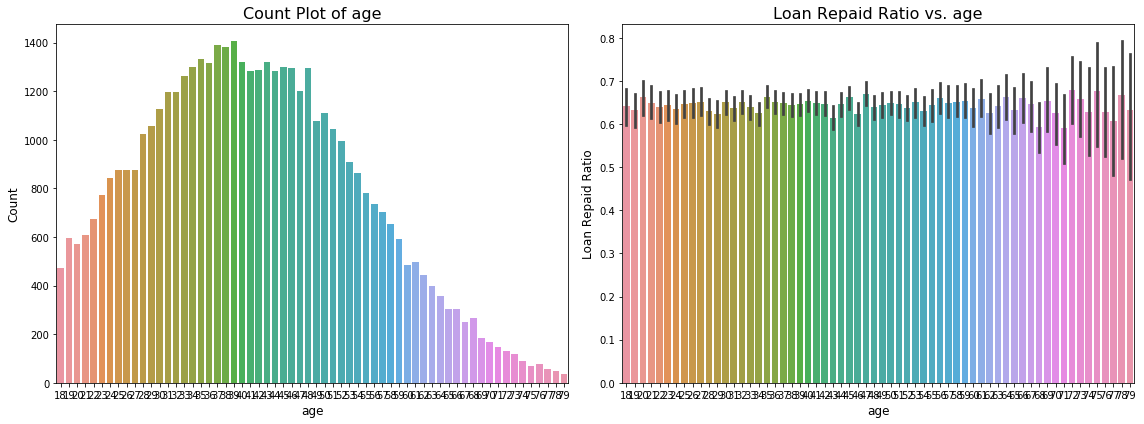

In [18]:
# visualization of 'age'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='age', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('age', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of age', fontsize=16)

sns.barplot(x='age', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('age', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. age', fontsize=16)
plt.tight_layout()
plt.show()

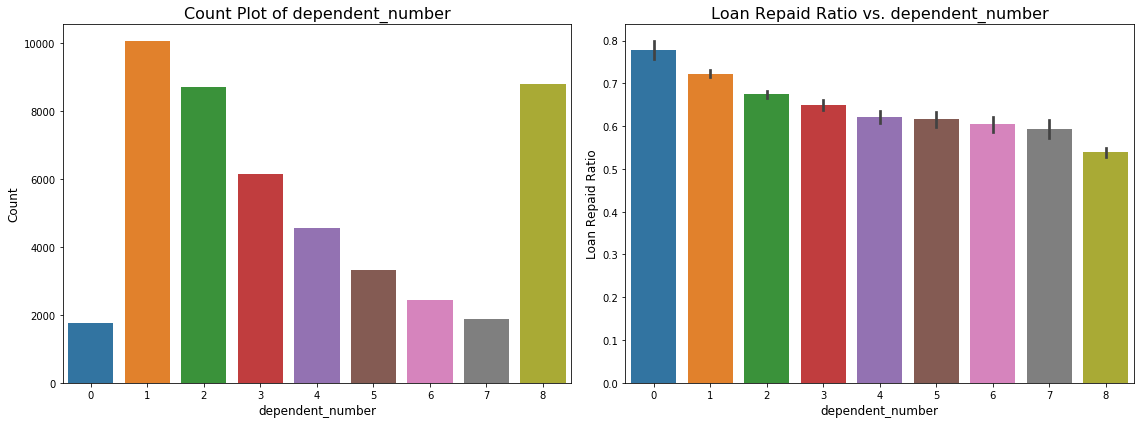

In [19]:
# visualization of 'age'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='dependent_number', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('dependent_number', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of dependent_number', fontsize=16)

sns.barplot(x='dependent_number', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('dependent_number', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. dependent_number', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
grouped = loanborrower[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit')
grouped.head()

,total_credit_card_limit,loan_repaid
3,5400,1.0
4,2900,0.0
6,7800,1.0
7,4300,0.0
8,3900,1.0
15,6100,0.0
18,3200,0.0
22,4600,1.0
23,10100,1.0
25,4100,1.0


In [21]:
loanborrower1=loanborrower[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit').agg({'loan_repaid':[np.mean]}).reset_index()
loanborrower1[:10]

,total_credit_card_limit,loan_repaid
,,mean
0,0,0.172757
1,500,0.000000
2,600,0.000000
3,700,0.000000
4,800,0.000000
5,900,0.000000
6,1000,0.263514
7,1100,0.296970
8,1200,0.325843


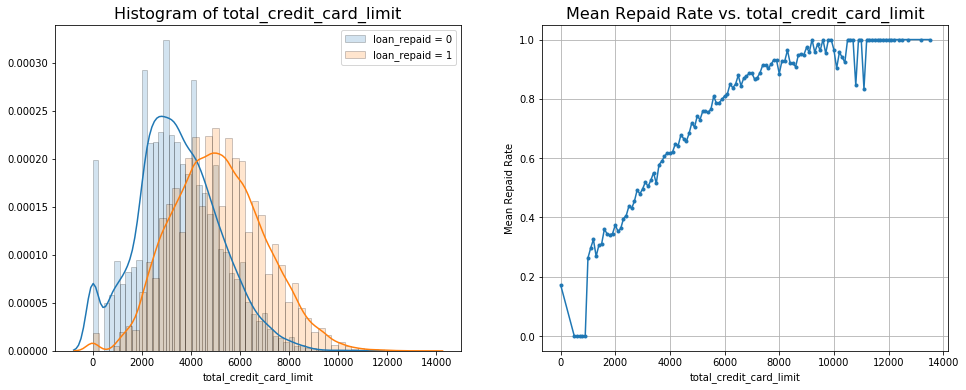

In [22]:
# Visualization of 'total_credit_card_limit'
loanborrower1=loanborrower[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit').agg({'loan_repaid':[np.mean]}).reset_index()

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
#warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['total_credit_card_limit'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 1]['total_credit_card_limit'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of total_credit_card_limit', fontsize=16)
ax[0].legend()
ax[1].plot(loanborrower1['total_credit_card_limit'],loanborrower1['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. total_credit_card_limit', fontsize=16)
ax[1].set_xlabel('total_credit_card_limit')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

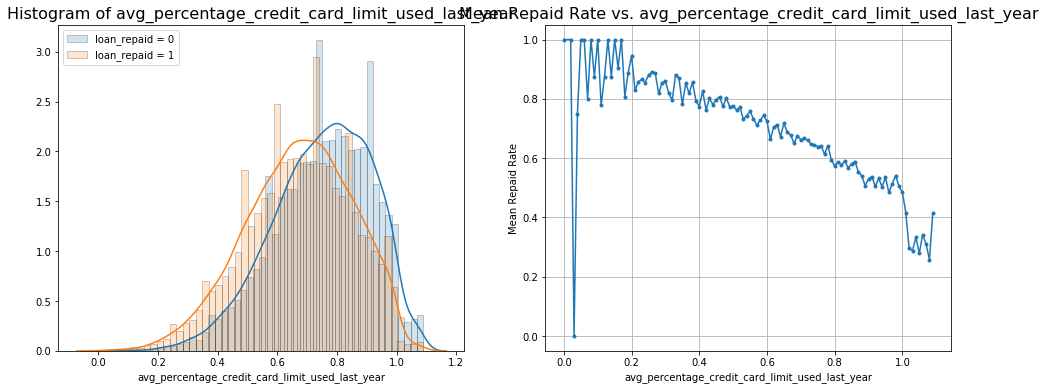

In [23]:
# Visualization of 'avg_percentage_credit_card_limit_used_last_year'
not_null = loanborrower[~loanborrower['avg_percentage_credit_card_limit_used_last_year'].isnull()]
grouped = not_null.groupby('avg_percentage_credit_card_limit_used_last_year')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(not_null[not_null['loan_repaid'] == 0]['avg_percentage_credit_card_limit_used_last_year'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(not_null[not_null['loan_repaid'] == 1]['avg_percentage_credit_card_limit_used_last_year'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of avg_percentage_credit_card_limit_used_last_year', fontsize=16)
ax[0].legend()
ax[1].plot(mean['avg_percentage_credit_card_limit_used_last_year'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. avg_percentage_credit_card_limit_used_last_year', fontsize=16)
ax[1].set_xlabel('avg_percentage_credit_card_limit_used_last_year')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

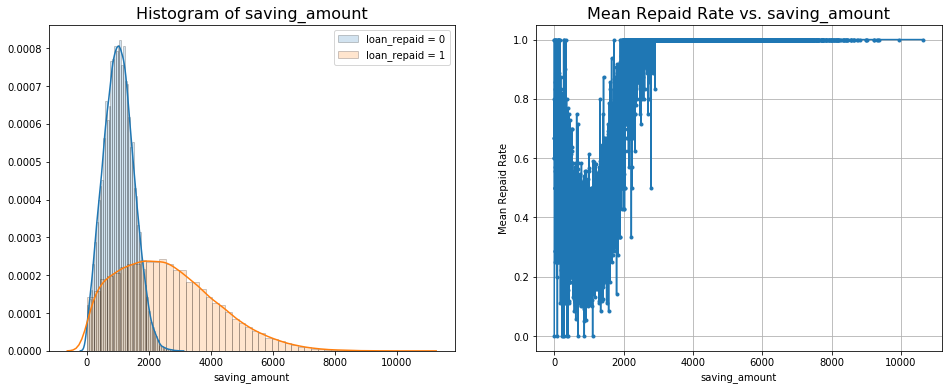

In [24]:

# Visualization of 'saving_amount'
grouped =loanborrower[['saving_amount', 'loan_repaid']].groupby('saving_amount')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['saving_amount'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot( loanborrower[ loanborrower['loan_repaid'] == 1]['saving_amount'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of saving_amount', fontsize=16)
ax[0].legend()
ax[1].plot(mean['saving_amount'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. saving_amount', fontsize=16)
ax[1].set_xlabel('saving_amount')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

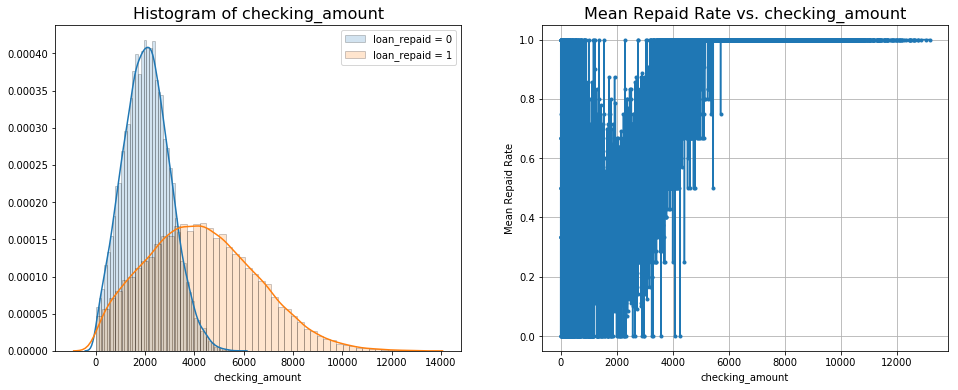

In [25]:
# Visualization of 'checking_amount'
grouped = loanborrower[['checking_amount', 'loan_repaid']].groupby('checking_amount')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['checking_amount'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 1]['checking_amount'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of checking_amount', fontsize=16)
ax[0].legend()
ax[1].plot(mean['checking_amount'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. checking_amount', fontsize=16)
ax[1].set_xlabel('checking_amount')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

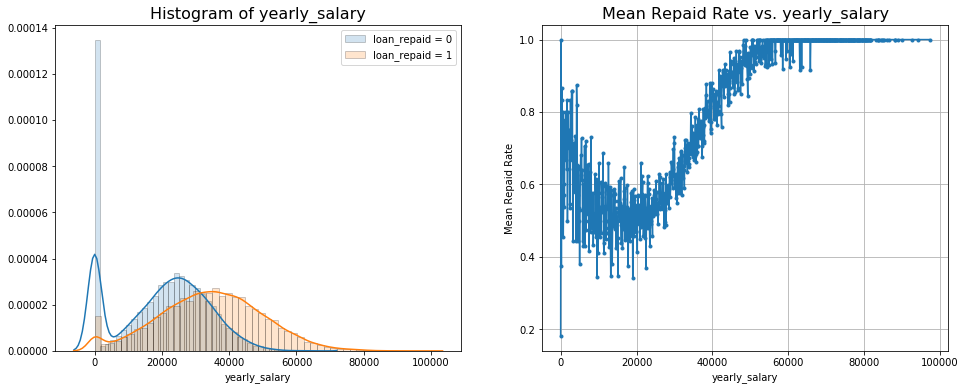

In [26]:
# Visualization of 'yearly_salary'
grouped = loanborrower[['yearly_salary', 'loan_repaid']].groupby('yearly_salary')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['yearly_salary'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 1]['yearly_salary'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of yearly_salary', fontsize=16)
ax[0].legend()
ax[1].plot(mean['yearly_salary'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. yearly_salary', fontsize=16)
ax[1].set_xlabel('yearly_salary')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

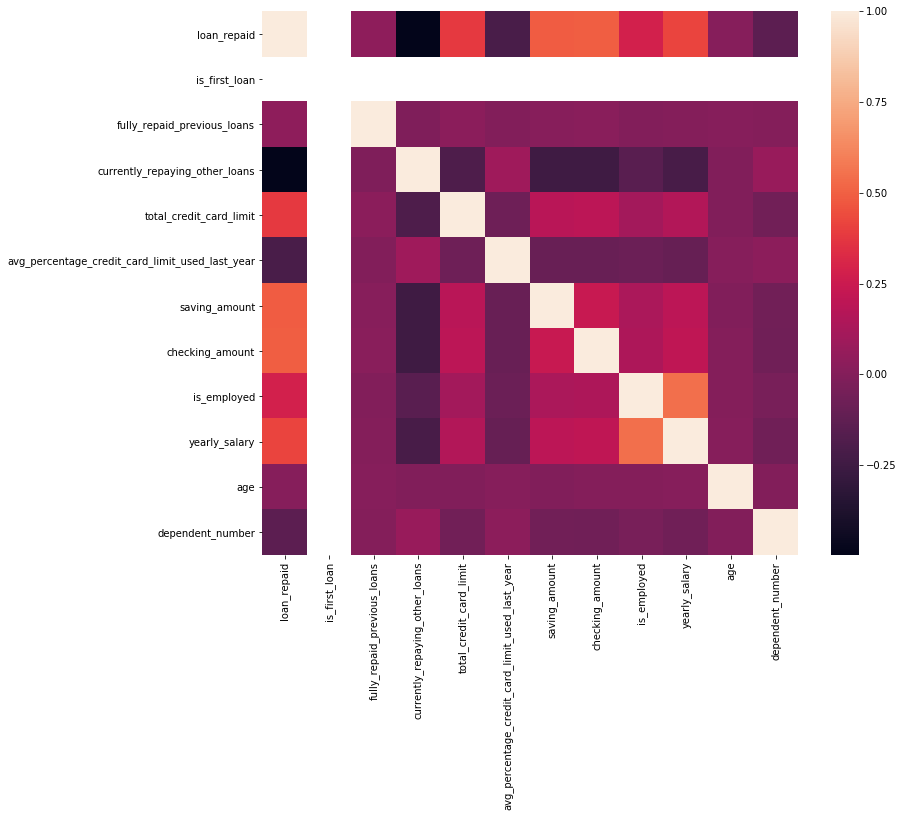

In [27]:
# feature correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(loanborrower.dropna(axis=0, how='any').corr(), ax=ax)
plt.show()

In [28]:
# there is a clear connection between 'is_first_loan' 
# and 'fully_repaid_previous_loans', 'currently_repaying_other_loans'
print(loanborrower[loanborrower['is_first_loan'] == 1]['fully_repaid_previous_loans'].unique())
print(loanborrower[loanborrower['is_first_loan'] == 1]['currently_repaying_other_loans'].unique())

[nan]
[nan]


In [29]:
# fill missing values with -1 for 'fully_repaid_previous_loans' and 'currently_repaying_other_loans'
loanborrower2= loanborrower.fillna({'fully_repaid_previous_loans': -1, 'currently_repaying_other_loans': -1})

In [30]:
# fill missing values with median
median =loanborrower2['avg_percentage_credit_card_limit_used_last_year'].median()
loanborrower2 =loanborrower2.fillna({'avg_percentage_credit_card_limit_used_last_year': median})

In [31]:
loanborrower2.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


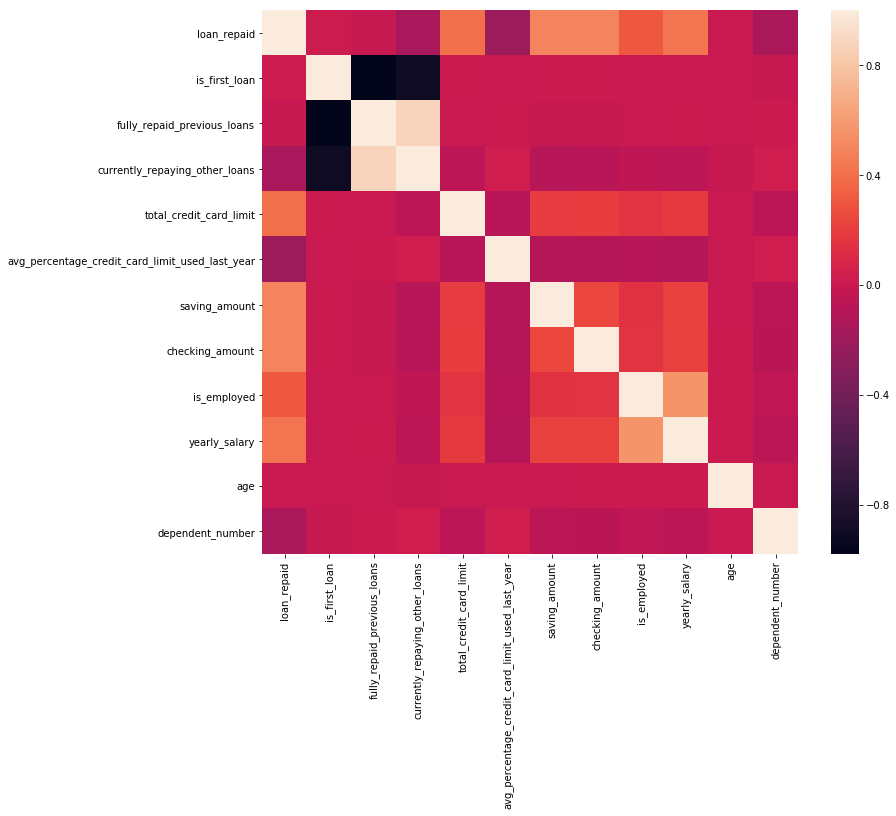

In [32]:
# feature correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(loanborrower2.corr(), ax=ax)
plt.show()

# Machine Learning

Here, I will try to implement the Random forest.

In [34]:
import h2o
from h2o.frame import H2OFrame
#from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.grid.grid_search import H2OGridSearch
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,08 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,2 months and 24 days
H2O cluster name:,H2O_from_python_Sipu_v812n9
H2O cluster total nodes:,1
H2O cluster free memory:,1.730 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### naives Bayes

#### get dummies

In [36]:
loanborrower2.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [37]:
#way1: get dummies
loanborrower2nbd=loanborrower2
dummies=pd.get_dummies(loanborrower2nbd.loan_purpose)
dummies.head()

,business,emergency_funds,home,investment,other
3,0,0,0,0,1
4,1,0,0,0,0
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,0,1,0


In [39]:
loanborrowernb1=pd.concat([loanborrower2nbd,dummies],axis='columns')
loanborrowernb1.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment,other
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,0,0,0,0,1
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4,1,0,0,0,0
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,1,0,0,0,0
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,0,1,0,0,0
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,0,0,0,1,0


In [40]:
#you can drop any dummies varible, because we just need n-1 dummies variables.
final=loanborrowernb1.drop(['loan_purpose','other'],axis='columns')
final.head()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment
3,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,0,0,0,0
4,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4,1,0,0,0
6,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,1,0,0,0
7,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2,0,1,0,0
8,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1,0,0,0,1


#### one hot encoding

In [266]:
#way2: one hot encoding
#loanborrower2nbone=loanborrower2
# Categorical boolean mask
#categorical_feature_mask = loanborrower2nbone.dtypes==object
# filter categorical columns using mask and turn it into a list
#categorical_cols = X.columns[categorical_feature_mask].tolist()


In [267]:
#way2: one hot encoding
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [268]:
loanborrower2nbone=loanborrower2
loanborrower2nbone.loan_purpose=le.fit_transform(loanborrower2nbone.loan_purpose)
loanborrower2nbone.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,4,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,0,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,0,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,3,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [269]:
X=loanborrower2nbone['loan_purpose'].values
X

array([4, 0, 0, ..., 0, 4, 0], dtype=int64)

In [270]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder() 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [271]:
X = ohe.fit_transform(loanborrower2nbone.loan_purpose.values.reshape(-1,1)).toarray()
X

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

#### Standardize Data

In [41]:
# separate array into input and output components
from sklearn.preprocessing import StandardScaler
import numpy as np
array=final.values
depentvariable=array[:,1:]
Y = array[:,0]
scaler = StandardScaler().fit(depentvariable)
rescaledX = scaler.transform(depentvariable)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-1.086  1.163  0.564  0.442 -1.024  0.886 -0.341  0.315 -0.826  1.285
   0.094 -0.54  -0.441 -0.568 -0.535]
 [ 0.921 -0.901 -0.83  -0.824  0.339 -0.651  0.091  0.315  0.341 -0.821
   0.094  1.85  -0.441 -0.568 -0.535]
 [-1.086  1.163  0.564  1.657 -2.274  1.462  0.403  0.315  1.342  0.739
  -0.669  1.85  -0.441 -0.568 -0.535]
 [-1.086  0.131  1.959 -0.115  1.816 -0.761 -0.883  0.315 -0.875  1.363
  -0.669 -0.54   2.269 -0.568 -0.535]
 [-1.086  1.163  0.564 -0.318 -0.286 -0.124  0.137  0.315 -1.059 -1.367
  -1.05  -0.54  -0.441 -0.568  1.869]]


#### Normalize Data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as K-Nearest Neighbors.

You can normalize data in Python with scikit-learn using the Normalizer class.

In [44]:
Yy = array[:,[3,4,5,8]]
Yy

array([[ 0.0e+00,  5.4e+03,  5.2e-01,  1.0e+00],
       [-1.0e+00,  2.9e+03,  7.6e-01,  1.0e+00],
       [ 0.0e+00,  7.8e+03,  3.0e-01,  1.0e+00],
       ...,
       [-1.0e+00,  3.1e+03,  6.8e-01,  1.0e+00],
       [-1.0e+00,  4.6e+03,  5.0e-01,  1.0e+00],
       [ 0.0e+00,  6.5e+03,  7.0e-01,  1.0e+00]])

In [46]:
normalizedatay=pd.DataFrame(Y, columns=['loan_repaid'])
print(normalizedatay[0:5])

   loan_repaid
0          1.0
1          0.0
2          1.0
3          0.0
4          1.0


In [47]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np

array1 = final.values
# separate array into input and output components
dd = array[:,1:]
Yyy = array[:,0]
scaler1 = Normalizer().fit(dd)
normalizedX = scaler1.transform(dd)
# summarize transformed data
np.set_printoptions(precision=3)
#print(normalizedX[0:5,:])
feature = ['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']
normalizedata=pd.DataFrame(normalizedX, columns=feature)
normalizedatay=pd.DataFrame(Yyy, columns=['loan_repaid'])
print(normalizedata[0:5])
normalfinal=pd.concat([normalizedata,normalizedatay],axis='columns')
print(normalfinal[0:5])

   is_first_loan  currently_repaying_other_loans  fully_repaid_previous_loans  \
0       0.000000                        0.000058                     0.000000   
1       0.000028                       -0.000028                    -0.000028   
2       0.000000                        0.000019                     0.000000   
3       0.000000                        0.000000                     0.000064   
4       0.000000                        0.000075                     0.000000   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                 0.313007                                         0.000030   
1                 0.082548                                         0.000022   
2                 0.149866                                         0.000006   
3                 0.273697                                         0.000065   
4                 0.293153                                         0.000049   

   saving_amount  checking_amount  is_

In [50]:
# Transform to H2O loanborrower2Frame,make sure convert all categorical varibles to dummy variables.
h2o_loanborrower2nbb = H2OFrame(normalfinal)
h2o_loanborrower2nbb.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,is_first_loan,currently_repaying_other_loans,fully_repaid_previous_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment,loan_repaid
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-0.0028657588865671243,-0.0028657588865671243,0.0,0.0,0.0,0.0,0.0,0.0,0.000231155518786312,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.101779124561446e-05,-7.3372211839270734e-06,-2.0222070516955004e-05,0.21582123825328212,4.1344673083342435e-05,0.09380145919700068,0.16457856427346224,3.454036231050738e-05,0.868931723448468,0.0023774271051037288,0.00022668198054839195,1.186183809515891e-05,1.0786113090011422e-05,1.3702798637285353e-05,1.1607932453919812e-05,0.6443530448650691
maxs,0.0028657588865671243,0.0013568564695722364,0.0013568564695722364,0.9986127864217916,0.002034688809462658,0.9967814073111908,0.9998634257670816,0.0006113253483769778,0.9997736936532368,0.12853649798025088,0.02187855284770228,0.0012177571799974638,0.002734819105962785,0.001330652840773349,0.0016073545838760346,1.0
sigma,6.571698381736799e-05,9.52656211779187e-05,8.474595402497888e-05,0.20481626364644623,6.102448700502602e-05,0.10438489443570396,0.16614256143937337,2.554477660827739e-05,0.2864088093299188,0.0034998126076754375,0.0004374070666986415,3.960486843625322e-05,4.513053789982215e-05,4.4776417265499516e-05,3.8863363765802755e-05,0.4787139097786377
zeros,21865,2132,15355,903,2,2,2,4297,4306,0,1768,36881,39901,36040,37051,16948
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,5.796423564046971e-05,0.0,0.3130068724585364,3.014140253304425e-05,0.1938903682173712,0.1602131473102583,5.796423564046971e-05,0.9158349231194214,0.0033619256671472432,0.00023185694256187885,0.0,0.0,0.0,0.0,1.0
1,2.8464665461018715e-05,-2.8464665461018715e-05,-2.8464665461018715e-05,0.08254752983695428,2.1633145750374224e-05,0.029887898734069652,0.10517693887846416,2.8464665461018715e-05,0.9905703580434512,0.0008824046292915802,0.00011385866184407486,2.8464665461018715e-05,0.0,0.0,0.0,0.0
2,0.0,1.921364350832439e-05,0.0,0.14986641936493025,5.764093052497317e-06,0.08081258459601239,0.08392519484436094,1.921364350832439e-05,0.9818171832753764,0.0009798958189245438,3.842728701664878e-05,1.921364350832439e-05,0.0,0.0,0.0,1.0


In [67]:
loanborrower2nbnb=loanborrower2

In [79]:
# Transform to H2O loanborrower2Frame,make sure convert all categorical varibles to factor.
h2o_loanborrower2nbnbb = H2OFrame(loanborrower2nbnb)
h2o_loanborrower2nbnbb['loan_repaid'] = h2o_loanborrower2nbnbb['loan_repaid'].asfactor()
h2o_loanborrower2nbnbb['is_first_loan'] = h2o_loanborrower2nbnbb['is_first_loan'].asfactor()
h2o_loanborrower2nbnbb['currently_repaying_other_loans'] = h2o_loanborrower2nbnbb['currently_repaying_other_loans'].asfactor()
h2o_loanborrower2nbnbb['fully_repaid_previous_loans'] = h2o_loanborrower2nbnbb['fully_repaid_previous_loans'].asfactor()
h2o_loanborrower2nbnbb['is_employed'] = h2o_loanborrower2nbnbb['is_employed'].asfactor()
h2o_loanborrower2nbnbb.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
type,enum,enum,enum,enum,enum,int,real,int,int,enum,int,int,int
mins,,,,,,0.0,0.0,0.0,0.0,,0.0,18.0,0.0
mean,,,,,,4527.84865908423,0.7002788852981893,2022.3665799303349,3499.160595123194,,29245.991941914694,41.524656901833694,3.752444705586084
maxs,,,,,,13500.0,1.09,10641.0,13165.0,,97200.0,79.0,8.0
sigma,,,,,,1975.1270160617464,0.17604200474449588,1493.4103028291931,2155.128303983445,,16286.512395296873,12.817586666159988,2.621350611703772
zeros,,,,,,903,2,2,2,,4306,0,1768
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,other,1,0,1,0,5400.0,0.52,3345.0,2764.0,1,15800.0,58.0,4.0
1,business,0,1,-1,-1,2900.0,0.76,1050.0,3695.0,1,34800.0,31.0,4.0
2,business,1,0,1,0,7800.0,0.3,4206.0,4368.0,1,51100.0,51.0,2.0


import h2o
h2o.init()
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
#data = h2o.import_file("myfile.csv")
train,valid = data.split_frame([0.8])
predictors = ['col1','col2','col3','col4']
result = 'col_result'
model = H2ONaiveBayesEstimator()
model.train(predictors,result,training_frame=train,validation_frame=valid)
model.model_performance()


In [80]:
# Split into 75% training and 25% test dataset
strat_split= h2o_loanborrower2nbnbb['loan_repaid'].stratified_split(test_frac=0.25, seed=42)

train= h2o_loanborrower2nbnbb[strat_split == 'train']
test= h2o_loanborrower2nbnbb[strat_split == 'test']
feature= ['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number']
target= 'loan_repaid'

In [81]:
test.head()

loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
business,1,0,1,0,6900,0.73,488,409,1,25700,45,3
other,1,0,1,0,5500,0.49,1905,2872,1,45300,46,5
investment,0,1,-1,-1,4100,0.61,544,704,1,7200,50,1
emergency_funds,1,1,-1,-1,3400,0.46,1422,4746,1,36100,30,2
home,0,1,-1,-1,5700,0.99,1042,3159,1,30200,46,2
other,0,0,1,1,0,0.71,1237,2793,1,35500,34,2
other,1,0,0,0,6600,0.68,2450,2782,1,38300,22,1
other,1,1,-1,-1,4100,0.63,3522,4642,1,33100,58,1
home,1,0,1,1,8300,0.69,1040,5611,1,28400,46,1
other,1,0,1,0,4000,0.41,3999,7085,1,19000,36,1


In [82]:
train.head()

loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
other,1,0,1,0,5400,0.52,3345,2764,1,15800,58,4
business,0,1,-1,-1,2900,0.76,1050,3695,1,34800,31,4
business,1,0,1,0,7800,0.3,4206,4368,1,51100,51,2
emergency_funds,0,0,0,1,4300,1.02,886,1597,1,15000,59,2
investment,1,0,1,0,3900,0.65,1837,3795,1,12000,24,1
emergency_funds,0,0,1,1,6100,0.42,1187,2036,1,24400,38,1
home,0,1,-1,-1,3200,0.98,812,1566,1,17600,62,8
home,1,0,1,0,4600,0.85,1915,8509,1,79700,58,3
business,1,0,1,0,10100,0.59,1304,2676,1,43700,30,1
business,1,1,-1,-1,4100,0.59,572,4265,1,51500,27,8


In [83]:
model.train(x=feature, y=target, training_frame=train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [85]:
from sklearn.metrics import auc, roc_curve, classification_report

In [86]:
# Make predictions
train_true = train.as_data_frame()['loan_repaid'].values
test_true = test.as_data_frame()['loan_repaid'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

naivebayes prediction progress: |█████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%


In [87]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      4237
          1       0.96      0.92      0.94      7677

avg / total       0.93      0.93      0.93     11914



In [88]:
model.varimp_plot()

TypeError: 'NoneType' object is not iterable

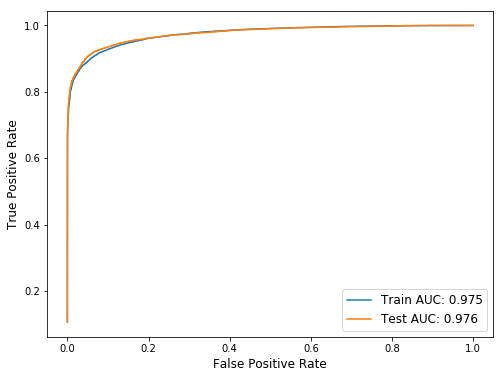

In [91]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


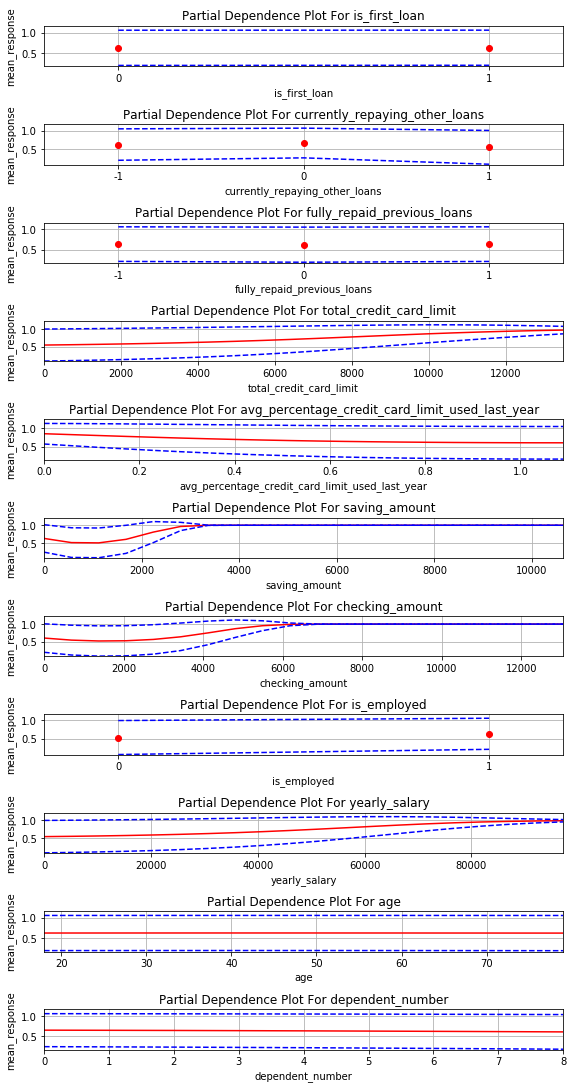

In [92]:
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))
plt.show()

In [345]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_b05b closed.


# Conclusion

In my model, saving_amount and checking_amount are the top two most important features.

For the is_employed, it is not very important in my current model. However, is_employed is directly related to salary. For people with no employment, their salary is 0. Since salary is also very important, we can conclude that is_employed is also important, but it is indirectly related to the model.



According to above plot, the most important feature is 'saving amount'. This makes perfect sense. Money in the saving account, meaure a person's ability to control his financial situation. More money in the saving account, more likely the borrower can repay.

As I mentioned, in my model, 'is_employed' is merged into feature 'salary', which correspond to the case 'salary=0'. according to above plot, salary is also a strong feature.

if not employed, then salary=0, which will impact negatively on 'grant decision'. that is very easy to understand, a person without any financial input, will be very unlikely to repay.
but even the person is employed, whether grant the loan or not, depends on his salary. higher salary indicates strong ability to repay.

# other  insights

Some useful feature which may include:

Marriage status.
Because even a borrow cannot repay, if he/she is married, his/her spouse can help to repay.

Housing status, has his/her own house, or rent appartments? if renting, how much is monthly rent?
Because even the borrower cannot repay, if he/she has house, the house can be sold to repay the debt

Educational level
Normally a person who received higher education, has stronger capability to earn money to repay, and has higher moral standard to repay.